<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/abtem_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: Simulate particles of proteins with abtem

# Resources
https://abtem.readthedocs.io/en/latest/walkthrough/introduction.html



# Setup

In [2]:
%%bash
pip install abtem

In [3]:
import numpy as np
from ase.io import read, proteindatabank
from abtem.plot import show_atoms
from abtem.potentials import Potential

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Visualize protein atoms from pdb file

In [4]:
from ase.io import read, proteindatabank


In [5]:
%%bash
wget https://files.rcsb.org/download/1N4K.pdb # IP3R Mitsu's 2002 IP3 bound structure


--2020-08-04 17:57:19--  https://files.rcsb.org/download/1N4K.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.213.55
Connecting to files.rcsb.org (files.rcsb.org)|132.249.213.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1N4K.pdb’

     0K .......... .......... .......... .......... ..........  129K
    50K .......... .......... .......... .......... ..........  193K
   100K .......... .......... .......... .......... .......... 96.5K
   150K .......... .......... .......... .......... .......... 77.2K
   200K .......... .......... .......... ........              99.5K=2.2s

2020-08-04 17:57:22 (108 KB/s) - ‘1N4K.pdb’ saved [244377]



In [6]:
atoms = proteindatabank.read_proteindatabank('1N4K.pdb')


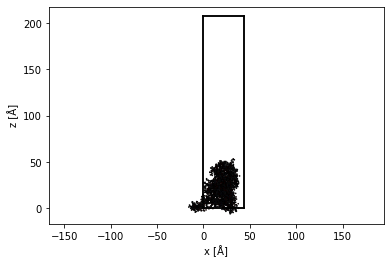

In [7]:
show_atoms(atoms, plane='xz')

## Calculate potential

### IAM 
Independent atom model

In [8]:
from abtem.potentials import Potential

In [9]:
%%bash
rm /usr/local/lib/python3.6/dist-packages/data/*txt
rm lobato* kirkland*

for STR in lobato kirkland;
do
  wget https://raw.githubusercontent.com/jacobjma/abTEM/661238b8da6e59df8e9dd17cdbe20503b3e7aabc/data/$STR.txt
  mkdir -p /usr/local/lib/python3.6/dist-packages/data/
  mv ${STR}.txt /usr/local/lib/python3.6/dist-packages/data/$STR.txt
done



rm: cannot remove '/usr/local/lib/python3.6/dist-packages/data/*txt': No such file or directory
rm: cannot remove 'lobato*': No such file or directory
rm: cannot remove 'kirkland*': No such file or directory
--2020-08-04 17:57:30--  https://raw.githubusercontent.com/jacobjma/abTEM/661238b8da6e59df8e9dd17cdbe20503b3e7aabc/data/lobato.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21338 (21K) [text/plain]
Saving to: ‘lobato.txt’

     0K .......... ..........                                 100% 1.56M=0.01s

2020-08-04 17:57:31 (1.56 MB/s) - ‘lobato.txt’ saved [21338/21338]

--2020-08-04 17:57:31--  https://raw.githubusercontent.com/jacobjma/abTEM/661238b8da6e59df8e9dd17cdbe20503b3e7aabc/data/kirkland.txt
Resolving raw.githubusercontent.com (raw.githubusercont

## Calculate potential (cont)

In [10]:
potential = Potential(atoms, 
                      sampling=1, # .03
                      parametrization='lobato')


In [11]:
potential.slice_thickness

0.5

In [13]:
%%time
precalculated_potential = potential.build(pbar=True)


CPU times: user 1min 18s, sys: 366 ms, total: 1min 18s
Wall time: 1min 18s


In [14]:
precalculated_potential.array.shape

(415, 45, 91)

In [20]:
%%bash
mkdir -p /content/drive/My\ Drive/repos/abtem/data

In [21]:
np.save('/content/drive/My Drive/repos/abtem/data/1n4k_potential',precalculated_potential.array)

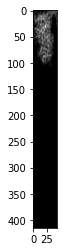

In [22]:
import matplotlib.pyplot as plt

image = precalculated_potential.array.mean(axis=2)
plt.imshow(image,cmap='gray')

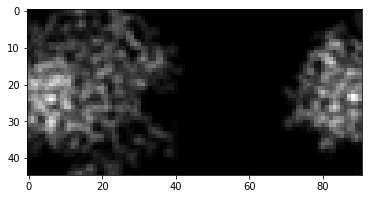

In [23]:
image = precalculated_potential.array.mean(axis=0)
plt.imshow(image,cmap='gray')

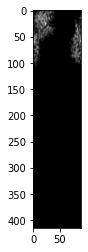

In [24]:
image = precalculated_potential.array.mean(axis=1)
plt.imshow(image,cmap='gray')

# Wave functions

In [25]:
from abtem.potentials import ArrayPotential
from abtem.waves import PlaneWave


In [26]:
wave = PlaneWave(energy=300e3)

wave.grid.match(potential)

wave = wave.build()

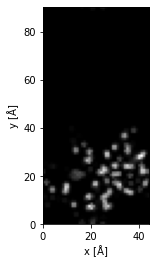

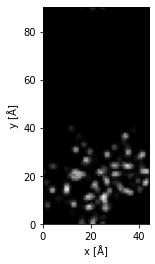

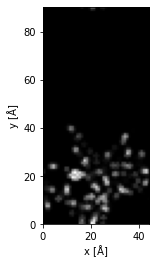

In [29]:
for i in range(7,10): potential[i].show()

In [30]:
from abtem.waves import FresnelPropagator, transmit

potential_slice = potential[7]
propagator = FresnelPropagator()

transmit(wave, potential_slice)
propagator.propagate(wave, potential_slice.thickness)

wave.show()

TypeError: ignored

In [32]:
for potential_slice in potential:
    transmit(wave, potential_slice)
    propagator.propagate(wave, potential_slice.thickness)

TypeError: ignored

In [33]:
exit_wave = PlaneWave(energy=300e3,sampling=1).multislice(potential)


TypeError: ignored